# Capstone  - Fake Job Posting - Data Wrangling and Exploratory Data Analysis

### Table of contents
1. [Background](#Background)
     -   1.1 [Data Source](#Data-Source)
     -   1.2 [Objective](#Objective)
     
     
2. [Loading Data](#Loading-Data)
     -   2.1 [Load libraries](#Load-libraries)
     -   2.2 [Load Dataset](#Load-Dataset)
     
     
3. [Data Quality Check](#Data-Quality-Check)
     -   3.1 [Duplicate Values](#Duplicate-Values)
     -   3.2 [Missing Values](#Missing-Values)
     
     
4. [Data Wrangling](#Data-Wrangling)
     -   4.1 [Split the location in Country, State and City](#Split-the-location-in-Country-State-and-City)
     -   4.2 [Split the salary range column to minimum and maximum](#Split-the-salary-range-column-to-minimum-and-maximum)
     -   4.3 [Dealing with missing values](#Dealing-with-missing-values)

### Background
    
Scammers advertise jobs the same way legitimate employers do—online (in ads, on job sites, college employment sites, and social media), in newspapers, and sometimes on TV and radio. They promise you a job, but what they want is your money and your personal information.

Fake Job or Employment Scams occur when criminal actors deceive victims into believing they have a job or a potential job. Criminals leverage their position as “employers” to persuade victims to provide them with personally identifiable information (PII), become unwitting money mules, or to send them money.

Fake Job Scams have existed for a long time but technology has made this scam easier and more lucrative. Cyber criminals now pose as legitimate employers by spoofing company websites and posting fake job openings on popular online job boards. They conduct false interviews with unsuspecting applicant victims, then request PII and/or money from these individuals. 


https://www.fbi.gov/contact-us/field-offices/elpaso/news/press-releases/fbi-warns-cyber-criminals-are-using-fake-job-listings-to-target-applicants-personally-identifiable-information

### What is a Fake Job Posting?

A fake job posting is a (rarely) smartly designed type of scam aimed at job seekers for a variety of unprofessional reasons. Still, these scams can look legit to an unsuspicious person scrolling through the vast pool of jobs. And although most tech talents aren’t actively looking for a new employer, falling for a phantom ad is still realistic. How so?

Scammers will sometimes go the extra mile to draw the attention of their target audience, more often than not, by offering incredibly high salary ranges or another sort of advantage that seems too good to be true. So, make sure to remember this: when a JD seems like a dream come true, do a thorough background check on the company or recruitment agency advertising it. Search through their website, social media, and various job boards before you take a leap of faith and end up wasting your time on a dead-end hiring process, or worse. 

https://www.omnesgroup.com/fake-job-posting/

#### 1.1 Data Source

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

#### 1.2 Problem Statement / Objective
To predicit fradulent job posting in the dataset.

### Loading Data 

#### 2.1 Load Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt
import collections, re

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded all the required libraries.
</div>

#### 2.2 Load Data Set 

In [3]:
df = pd.read_csv('fake_job_postings.csv')

<div class="alert alert-success">
  <strong>Success!</strong> Successfully loaded data.
</div>

In [4]:
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [5]:
df.shape

(17880, 18)

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Data Quality Check

#### 3.1 Duplicate Values

In [8]:
if len(df[df.duplicated(keep=False)]) == 0:
    print("There is no duplicated records in the fake job posting dataset")
else:
    print("There are duplicated records in the fake job posting dataset. Please indetify the reasons and work to fix")

There is no duplicated records in the fake job posting dataset


<div class="alert alert-success">
  <strong>Success!</strong> There is no duplicated values in the dataset.
</div>

#### 3.2 Missing Values

In [9]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


#### 3.3  Graphical representation of missing values

C:\Users\pbhardwaj76\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


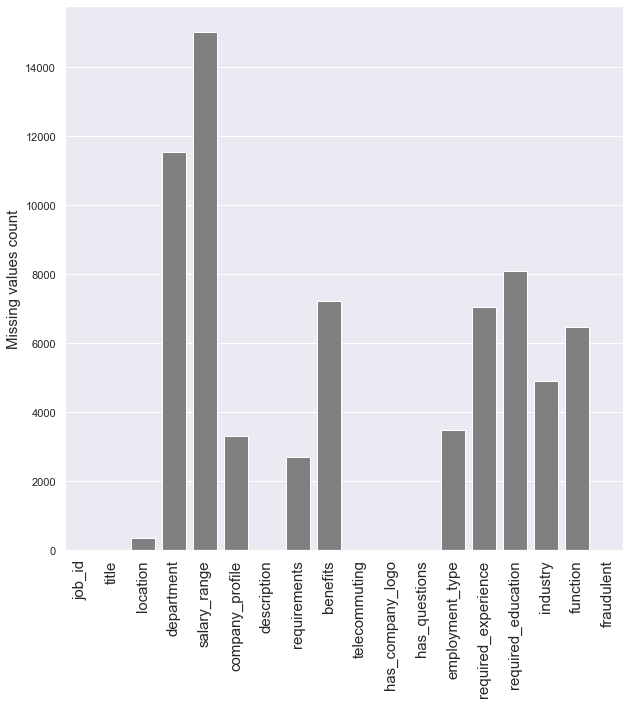

In [10]:
null_values = df.isnull().sum()
plt.figure(figsize = (10,10))
sns.barplot(null_values.index, null_values, color = 'grey')
plt.ylabel('Missing values count', fontsize = 15)
plt.xticks(rotation = '90', fontsize=15)
plt.show()

### Data Wrangling 

#### Job ID

In [11]:
# number of unique job_id 
len(pd.unique(df['job_id']))

17880

<div class="alert alert-info">
  <strong>Info!</strong> job_id is unique identifer in the dataset.
</div>

#### Location 

In [12]:
location = df["location"].str.split(",", expand= True, n= 2)
location.columns = ["country", "state", "city"]
df[["country", "state", "city"]] = location

In [13]:
#drop the original location column from the dataset
df = df.drop(columns= "location")

In [14]:
df.shape

(17880, 20)

<div class="alert alert-success">
  <strong>Success!</strong> dropped the original location column and splitted location into City, State and Country
</div>

#### Department

In [15]:
# number of unique department
print(df['department'].value_counts())

Sales                          551
Engineering                    487
Marketing                      401
Operations                     270
IT                             225
                              ... 
Call Center CSR                  1
Acquisitions and Divesments      1
ACT                              1
I9 Manufacturing (345)           1
Graphics/Production              1
Name: department, Length: 1337, dtype: int64


In [16]:
df['department'] =df['department'].fillna("None")

In [17]:
df['department']=df['department'].str.lower()
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]')

In [18]:
def clean_string(subject):
    clean_tokens = re.findall(r"(?i)\b[a-z]+\b", subject)
    clean_s = ' '.join(clean_tokens)
    return clean_s

# source: https://github.com/TommyJiang91/Fake_Job_Posting_Detection/blob/master/Data_Cleaning_and_Salary_Matching_Final.ipynb

In [19]:
df['department']= df['department'].apply(lambda x: clean_string(x))

In [20]:
print(df['department'].value_counts())

none                                                    11547
sales                                                     582
engineering                                               512
marketing                                                 421
operations                                                276
                                                        ...  
marketing commercial                                        1
human resource                                              1
tech network                                                1
exec                                                        1
internships special projects part time opportunities        1
Name: department, Length: 1180, dtype: int64


<div class="alert alert-info">
  <strong>Info!</strong> releatively cleaner department data with 1180 unique department values. 
</div>

#### Salary Range

In [21]:
salary = df["salary_range"].str.split("-", expand= True, n= 1)
df[["min_salary", "max_salary"]] = salary

In [22]:
df = df.drop(columns= "salary_range")

<div class="alert alert-success">
  <strong>Success!</strong> Splitted the salary_range into minimum and maxium column and dropped the original salary_range column.
</div>

#### Benefits

In [23]:
# number of unique department
print(df['benefits'].value_counts())

See job description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### Extracting Keywords fron Benefits

##### reference: https://www.andyfitzgeraldconsulting.com/writing/keyword-extraction-nlp/

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pbhardwaj76\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pbhardwaj76\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [26]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
df['word_count'] = df['benefits'].apply(lambda x: len(str(x).split(" ")))
ds_count = len(df.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(df['benefits'][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [27]:
#View sample pre-processed corpus item
corpus[10]

'benefit fullbonus eligible yesinterview travel reimbursed yes'

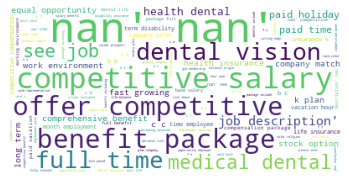

In [28]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [30]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['nan',
 'get',
 'part',
 'second',
 'team',
 'gain',
 'experience',
 'working',
 'project',
 'located']

        Keyword  Frequency
0           nan       7210
1          work       4525
2       benefit       4178
3       company       3824
4   competitive       3049
5   opportunity       2864
6          team       2848
7        salary       2723
8         offer       2699
9          time       2600
10         paid       2398
11          amp       2106
12    insurance       2065
13       dental       1986
14         full       1969
15          day       1902
16     employee       1868
17  environment       1821
18      working       1793
19      package       1710


[Text(0, 0, 'nan'),
 Text(1, 0, 'work'),
 Text(2, 0, 'benefit'),
 Text(3, 0, 'company'),
 Text(4, 0, 'competitive'),
 Text(5, 0, 'opportunity'),
 Text(6, 0, 'team'),
 Text(7, 0, 'salary'),
 Text(8, 0, 'offer'),
 Text(9, 0, 'time'),
 Text(10, 0, 'paid'),
 Text(11, 0, 'amp'),
 Text(12, 0, 'insurance'),
 Text(13, 0, 'dental'),
 Text(14, 0, 'full'),
 Text(15, 0, 'day'),
 Text(16, 0, 'employee'),
 Text(17, 0, 'environment'),
 Text(18, 0, 'working'),
 Text(19, 0, 'package')]

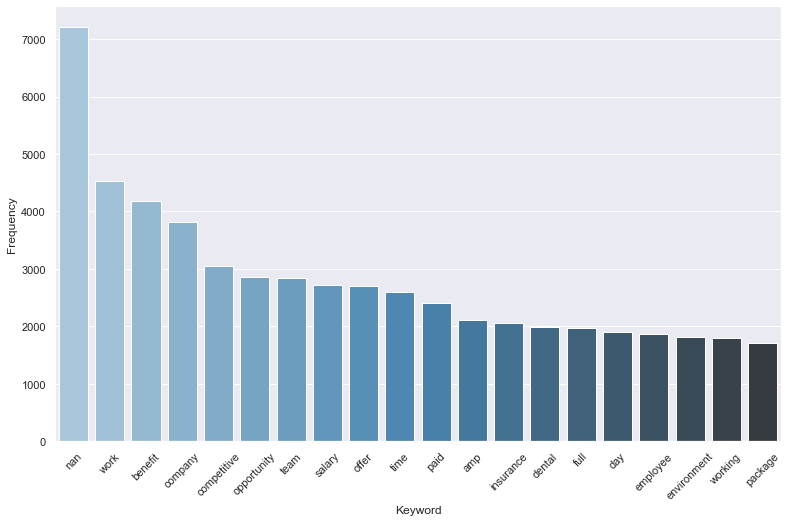

In [31]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)

                  Bi-gram  Frequency
0      competitive salary       1222
1         benefit package       1024
2       offer competitive        886
3           dental vision        879
4               full time        879
5          medical dental        778
6         job description        776
7                 see job        728
8           health dental        542
9               paid time        469
10       work environment        440
11           paid holiday        438
12           fast growing        426
13  comprehensive benefit        426
14       health insurance        406
15      equal opportunity        406
16           stock option        396
17              long term        374
18          company match        362
19         life insurance        353


[Text(0, 0, 'competitive salary'),
 Text(1, 0, 'benefit package'),
 Text(2, 0, 'offer competitive'),
 Text(3, 0, 'dental vision'),
 Text(4, 0, 'full time'),
 Text(5, 0, 'medical dental'),
 Text(6, 0, 'job description'),
 Text(7, 0, 'see job'),
 Text(8, 0, 'health dental'),
 Text(9, 0, 'paid time'),
 Text(10, 0, 'work environment'),
 Text(11, 0, 'paid holiday'),
 Text(12, 0, 'fast growing'),
 Text(13, 0, 'comprehensive benefit'),
 Text(14, 0, 'health insurance'),
 Text(15, 0, 'equal opportunity'),
 Text(16, 0, 'stock option'),
 Text(17, 0, 'long term'),
 Text(18, 0, 'company match'),
 Text(19, 0, 'life insurance')]

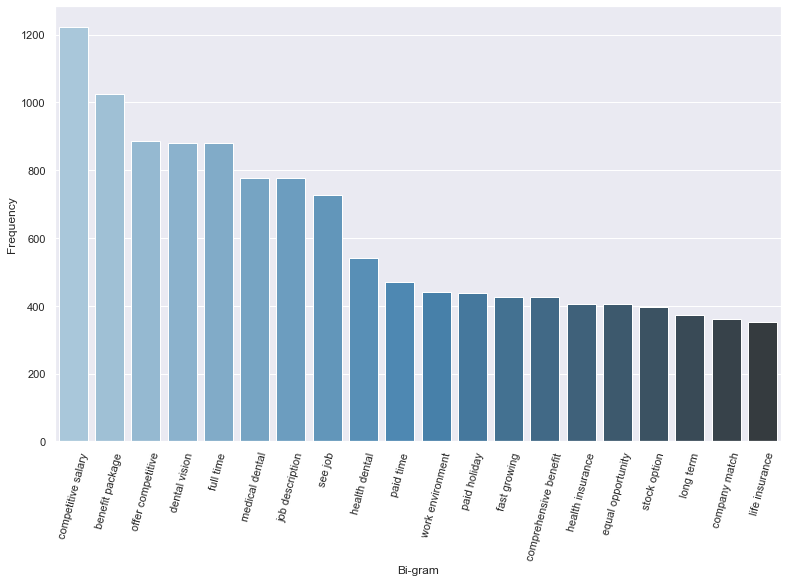

In [32]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)

                         Tri-gram  Frequency
0             see job description        726
1           medical dental vision        515
2        offer competitive salary        391
3   comprehensive benefit package        370
4              full time employee        340
5      equal opportunity employer        306
6               package full time        259
7            benefit package full        258
8              plan company match        228
9             without regard race        228
10           long term disability        221
11        dental vision insurance        214
12           health dental vision        166
13              work life balance        166
14         dental life disability        161
15      month employment vacation        159
16              regard race color        159
17            vacation hour month        158
18          hour month employment        158
19       employment vacation hour        158


[Text(0, 0, 'see job description'),
 Text(1, 0, 'medical dental vision'),
 Text(2, 0, 'offer competitive salary'),
 Text(3, 0, 'comprehensive benefit package'),
 Text(4, 0, 'full time employee'),
 Text(5, 0, 'equal opportunity employer'),
 Text(6, 0, 'package full time'),
 Text(7, 0, 'benefit package full'),
 Text(8, 0, 'plan company match'),
 Text(9, 0, 'without regard race'),
 Text(10, 0, 'long term disability'),
 Text(11, 0, 'dental vision insurance'),
 Text(12, 0, 'health dental vision'),
 Text(13, 0, 'work life balance'),
 Text(14, 0, 'dental life disability'),
 Text(15, 0, 'month employment vacation'),
 Text(16, 0, 'regard race color'),
 Text(17, 0, 'vacation hour month'),
 Text(18, 0, 'hour month employment'),
 Text(19, 0, 'employment vacation hour')]

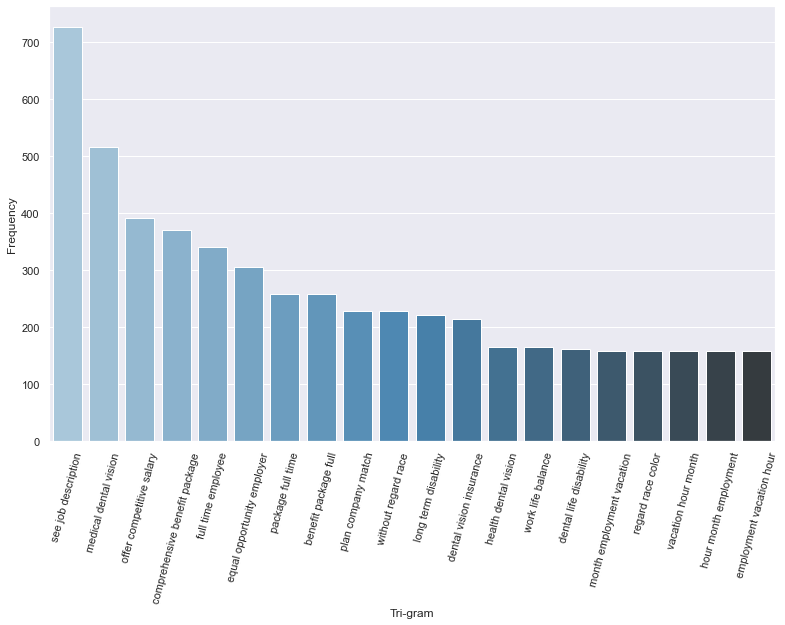

In [33]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)

In [34]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents

from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [35]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

# import csv
# with open(file_prefix + 'td_idf.csv', 'w', newline="") as csv_file:  
#     writer = csv.writer(csv_file)
#     writer.writerow(["Keyword", "Importance"])
#     for key, value in keywords.items():
#        writer.writerow([key, value])


Abstract:
nan

Keywords:
nan 1.0


#### Final keyword for benefits

In [36]:
benefits_kw = ['benefits', 'mental','dental','visison', 'life insurance', 'health insurance', 'work life balance', 'long term disability', 'stock options', 'work life balance']

In [38]:
# Fill in the missing values
df['benefits'] = df['benefits'].fillna("None")

# Now we will convert it into 'int64' type.
df.benefits = df.benefits.astype('str')

#count of benefits keywords 
for keyword in benefits_kw:
    df[keyword] = df['benefits'].apply(lambda _str: _str.lower().count(keyword))
print(df)

AttributeError: 'int' object has no attribute 'lower'

#### 4.3 Dealing with missing values

In [ ]:
columns = ['country','state','city','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function']
df[columns] = df[columns].fillna('none')

In [ ]:
df.isnull().sum()

In [ ]:
df.min_salary = df.min_salary.fillna(0)

In [ ]:
df.max_salary = df.max_salary.fillna(0)

In [ ]:
df.isnull().sum()

<div class="alert alert-success">
  <strong>Success!</strong> filled missing values with 'not provided' and zero for min_salary and max_salary

In [ ]:
# Modify Columns department, salary_range, benefits, required_experience, required_education

In [ ]:
# temp_df = df[['department', 'salary_range', 'benefits', 'required_experience', 'required_education']]
# temp_df[~temp_df.isnull()] = 1
# temp_df[temp_df.isnull()] = 0
# temp_df = temp_df.add_prefix('has_')
# df.drop(['department', 'salary_range', 'benefits', 'required_experience', 'required_education'], axis=1, inplace=True)
# df = df.join(temp_df)

### Exploratory Data Analysis

#### 5.1 Count of real and fradulent job posting 

In [ ]:
sns.countplot(df.fraudulent,palette=["#0b5394", "#9fc5e8"]).set_title('Real & Fradulent')
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

#### 5.2 Count of real and fraudulent job posting by Country 

In [ ]:
sns.countplot(x='country', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

#### 5.3 Count of real and fraudulent job posting by Employment 

In [ ]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
employment_type_cross = pd.crosstab(df["employment_type"], df["fraudulent"])

In [ ]:
employment_type_cross

In [ ]:
sns.countplot(x='employment_type', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['employment_type'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

#### 5.4 Count of real and fraudulent job posting by department 

In [ ]:
sns.countplot(x='department', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['department'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

#### 5.5 Count of real and fraudulent job posting by telecommuting 

In [ ]:
sns.countplot(x='telecommuting', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['telecommuting'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### 5.6 Count of real and fraudulent job posting by has_company_logo

In [ ]:
sns.countplot(x='has_company_logo', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['has_company_logo'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

In [ ]:
#### 5.7 Count of real and fraudulent job posting by experience 

In [ ]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=6, height=5
sns.countplot(x='required_experience', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['required_experience'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

#### 5.8 Count of real and fraudulent job posting by Function 

In [ ]:
sns.set(rc={"figure.figsize":(15, 6)}) #width=6, height=5
sns.countplot(x='function', data=df, hue="fraudulent", palette=["#0b5394", "#9fc5e8"], order=df['function'].value_counts().iloc[:10].index)
plt.xticks()
plt.show()

### Comparing number of characters in Real and Fake job postings 

In [ ]:
"""Extracting Text Featurs"""

text_df = df[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df.head()

#### 6.1 Characters in Descriptions

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['description'].str.len()
ax1.hist(length,bins = 20,color='#0b5394')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['description'].str.len()
ax2.hist(length, bins = 20,color = '#9fc5e8')
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

The distribution of charaters in description of the fake and real post are similar but some fake post reach to 6000 to 6500 characters.

#### 6.2 Characters in Requirement

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='#0b5394')
ax1.set_title('Fake Post')
length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length,bins = 20, color = '#9fc5e8')
ax2.set_title('Real Post')
fig.suptitle('Characters in requirements')
plt.show()